## $\mu=m-M=5log_{10}(\frac{d_l}{10pc})$

## $d_l=(1+z)\chi$

## $\chi(a)=\int_{t_e}^{t_0} \frac{c dt}{a}=c\int_{a_e}^{a_0} \frac{a^{-1}da}{\frac{da}{dt}}$

## $\frac{da}{dt}=\dot{a}$

## $\chi(a)=c\int_{a_e}^{a_0} \frac{a^{-1}da}{\frac{da}{dt}}=c\int_{a_e}^{a_0} \frac{a^{-2}da}{\frac{\dot{a}}{a}}=c\int_{a_e}^{a_0} \frac{a^{-2}da}{H}$

## $a=\frac{1}{1+z}$

## $da=-\frac{dz}{(1+z)^2}=-a^2dz$

## $\chi=c\int_{a_e}^{a_0} \frac{a^{-2}da}{H}=-c\int_z^0 \frac{dz^{\prime}}{H}=c\int_0^z \frac{dz^{\prime}}{H}$

## $d_l(z)=c(1+z)\int_0^z \frac{dz}{H(z)}$

## $H(z)=H_0\sqrt{\Omega_m (1+z)^3+\Omega_r (1+z)^4+\Omega_{\Lambda}}$

## $\mu=5log_{10}(\frac{c(1+z)\int_0^z \frac{dz}{H(z)}}{10pc})$

**Asumptions:**
* $\Omega_r=0.0$
* $\Omega_{\Lambda}=1-\Omega_m$

In [1]:
x = 3
y = 4
print(x+y)

7


In [2]:
2*x+3*y

18

In [3]:
sqrt(x)

NameError: name 'sqrt' is not defined

In [4]:
sin(x)

NameError: name 'sin' is not defined

In [5]:
import numpy as np

In [6]:
np.sqrt(x)

1.7320508075688772

In [7]:
np.sin(x)

0.1411200080598672

In [8]:
%matplotlib inline
import pylab as plt

In [9]:
x = np.linspace(0,10,100)

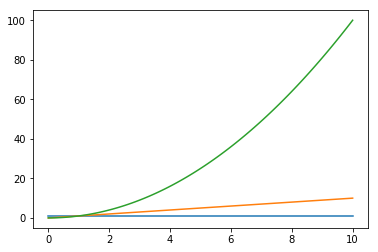

In [10]:
for i in range(3):
    plt.plot(x,x**i)

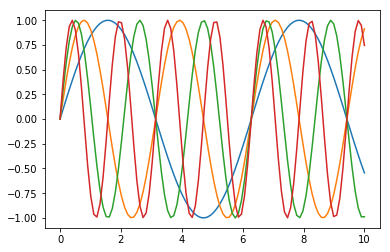

In [11]:
for i in range(1,5):
    plt.plot(x,np.sin(i*x))

In [21]:
def times3(x):
    return 3*x

In [24]:
times3(1)

3

In [28]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
a = []
a.append(1)
a

[1]

In [48]:
a.append(3)
a

[1, 3]

# Astronomy

In [75]:
!wget supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt

--2019-08-10 17:29:10--  http://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt
Resolving supernova.lbl.gov (supernova.lbl.gov)... 128.3.28.216
Connecting to supernova.lbl.gov (supernova.lbl.gov)|128.3.28.216|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33899 (33K) [text/plain]
Saving to: ‘SCPUnion2.1_mu_vs_z.txt’

SCPUnion2.1_mu_vs_z 100%[===================>]  33.10K  73.9KB/s    in 0.4s    

2019-08-10 17:29:11 (73.9 KB/s) - ‘SCPUnion2.1_mu_vs_z.txt’ saved [33899/33899]



In [12]:
data = np.loadtxt('SCPUnion2.1_mu_vs_z.txt', comments='#',
                  dtype={'names': ('Supernova Name', 'z', 'mu', 'error', 'p'),
                         'formats': ('S10', 'f4', 'f4', 'f4', 'f4')})

In [15]:
z_sn = data['z']
mu_sn = data['mu']
error_sn = data['error']

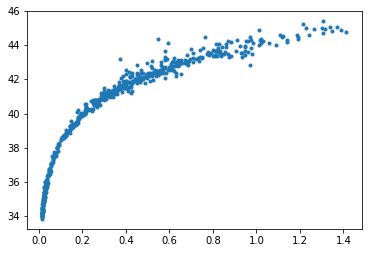

In [14]:
plt.plot(z_sn,mu_sn,'.')

Text(0, 0.5, '$\\mu$')

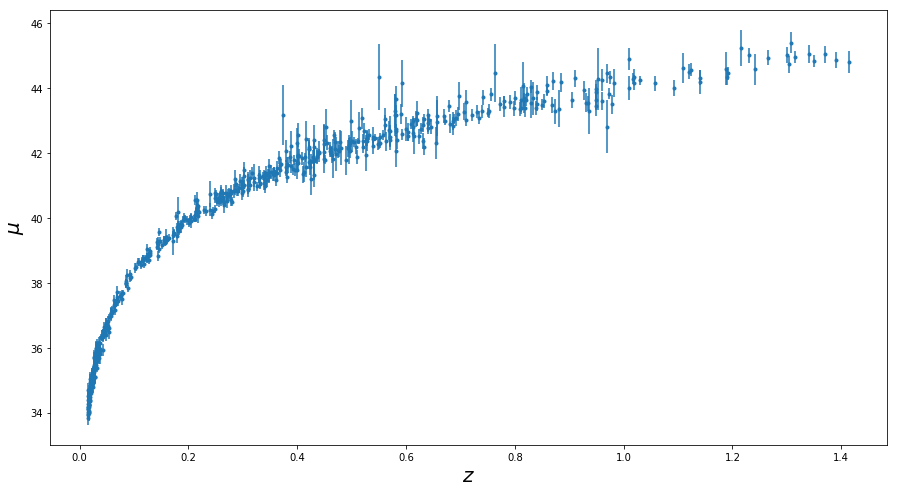

In [19]:
fig,ax = plt.subplots(1,1,figsize=(15,8))
ax.errorbar(z_sn,mu_sn,error_sn,ls='none',marker='.')
ax.set_xlabel('$z$',fontsize=20)
ax.set_ylabel('$\mu$',fontsize=20)

In [20]:
c = 2.99792458e5
h_known = 0.6814
H0_known = 100*h_known
omega_m_known = 0.3036
# omega_L_known = 0.6964;

In [25]:
def H(z,H0,omega_m):
    omega_L = 1.-omega_m
    return H0*np.sqrt(omega_m*(1+z)**3+omega_L)

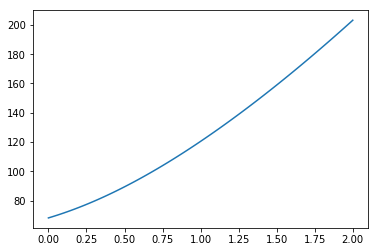

In [26]:
zs = np.linspace(0,2,100)
plt.plot(zs,H(zs,H0_known,omega_m_known))

In [31]:
from scipy.integrate import quad

In [55]:
def fun(x):
    return x
quad(fun, 0, 4)[0]

8.0

In [32]:
def H_inv(z,H0,omega_m):
    return 1./H(z,H0,omega_m)

def d_l(z,H0,omega_m):
    dl=c*(1+z)*quad(H_inv, 0, z, args=(H0,omega_m))[0]
    return 1e6*dl

def d_ls(zs,H0,omega_m):
    num = len(zs)
    dls = np.zeros(num)
    for i in range(num):
        dls[i]=d_l(zs[i],H0,omega_m)
    return dls

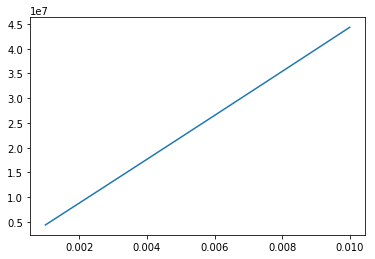

In [34]:
zs = np.linspace(0.001,0.01,100)
plt.plot(zs,d_ls(zs,H0_known,omega_m_known))

In [37]:
def mu(z,H0,omega_m):
    return 5*np.log10(d_ls(z,H0,omega_m)/10)

<ErrorbarContainer object of 3 artists>

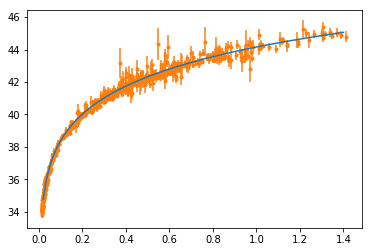

In [45]:
zs = np.linspace(0.02,1.4,100)
plt.plot(zs,mu(zs,H0_known,omega_m_known),zorder=1)
plt.errorbar(z_sn,mu_sn,s_sn,ls='none',marker='.',zorder=0)

## $\chi^2=\sum_i \frac{(\mu_{theory}(z_i,H_0)-\mu_{obs}(z_i))^2}{\sigma_i^2}$

## example-1: 
**Asumptions:**
* $\Omega_r=0.0$
* $\Omega_m=0.3$
* $\Omega_{\Lambda}=1-\Omega_m$

**free parameter(s):**

* $H_0=?$

In [49]:
chi2 = []
H0s = np.linspace(60,80,100)
for H0 in H0s:
    mu_th = mu(z_sn,H0,omega_m_known)
    delta = mu_sn-mu_th
    ch = np.sum((delta/s_sn)**2)

    chi2.append(ch)

chi2 = np.array(chi2)

Text(0, 0.5, '$\\chi^2$')

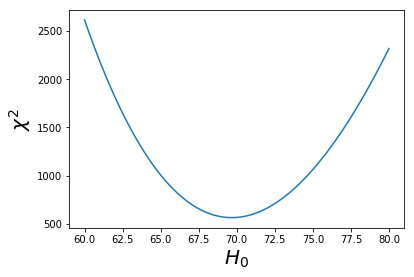

In [53]:
plt.plot(H0s,chi2)
plt.xlabel('$H_0$',fontsize=20)
plt.ylabel('$\chi^2$',fontsize=20)

## example-2: 
**Asumptions:**
* $\Omega_r=0.0$
* $\Omega_{\Lambda}=1-\Omega_m$

**free parameter(s):**

* $H_0=?$
* $\Omega_m=?$

In [54]:
H0s = np.linspace(60,80,50)
omega_ms = np.linspace(0.2,0.4,50)
chi2 = np.zeros((50,50))

for i in range(50):
    omega_m = omega_ms[i]
    for j in range(50):
        H0 = H0s[j]

        mu_th = mu(z_sn,H0,omega_m)
        delta = mu_sn-mu_th
        ch = np.sum((delta/s_sn)**2)

        chi2[i,j] = ch

In [59]:
np.min(chi2)

562.5750893186097

In [64]:
np.argwhere(chi2<562.58)

array([[17, 25]])

In [65]:
chi2[17, 25]

562.5750893186097

In [69]:
omega_m_best = omega_ms[17]
H0_best = H0s[25]

<ErrorbarContainer object of 3 artists>

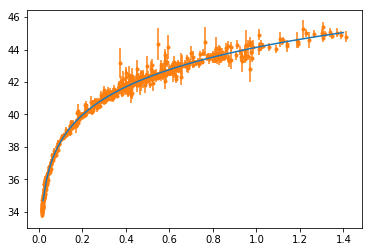

In [70]:
zs = np.linspace(0.02,1.4,100)
plt.plot(zs,mu(zs,H0_best,omega_m_best),zorder=1)
plt.errorbar(z_sn,mu_sn,s_sn,ls='none',marker='.',zorder=0)